###EVALUASI TES

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Found 300 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step
Accuracy: 0.93
Precision: 0.9300263359669301
Recall: 0.93
F1-Score: 0.929998249956249
Confusion Matrix:
[[ 90  10   0]
 [ 11  89   0]
 [  0   0 100]]


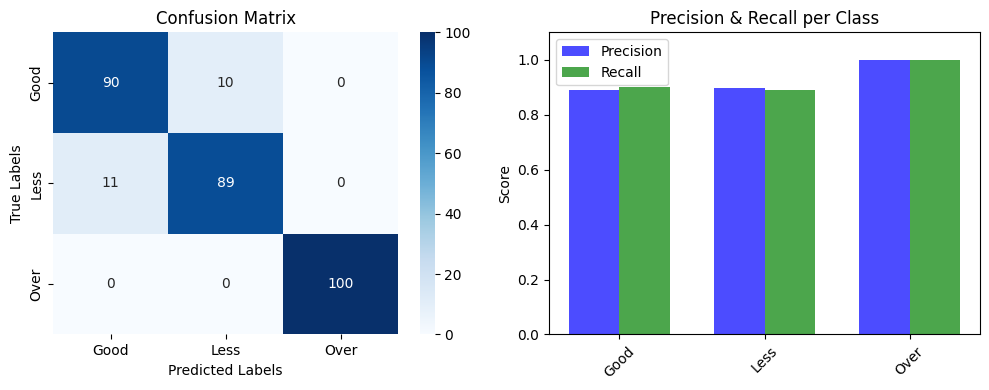

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Mount Google Drive
drive.mount('/content/drive')

# Muat model yang sudah disimpan
model_path = '/content/drive/My Drive/hasil_testing_dahak/model3.h5'
model = load_model(model_path)

# Inisialisasi datagen menggunakan ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

dataset_path = '/content/drive/MyDrive/ZN Staining'

# Pastikan validation_generator sudah diinisialisasi
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Lakukan prediksi pada data validasi
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = validation_generator.classes

# Hitung metrik evaluasi
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

# Tampilkan hasil evaluasi
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

# Tampilkan confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print('Confusion Matrix:')
print(conf_matrix)

# Visualisasi Confusion Matrix
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

# Visualisasi Precision & Recall
class_labels = list(validation_generator.class_indices.keys())
class_precisions = precision_score(y_true, y_pred_classes, average=None)
class_recalls = recall_score(y_true, y_pred_classes, average=None)

x = np.arange(len(class_labels))
bar_width = 0.35

plt.subplot(1, 2, 2)
plt.bar(x - bar_width/2, class_precisions, bar_width, label="Precision", color="blue", alpha=0.7)
plt.bar(x + bar_width/2, class_recalls, bar_width, label="Recall", color="green", alpha=0.7)
plt.xticks(ticks=x, labels=class_labels, rotation=45)
plt.ylim(0, 1.1)
plt.ylabel("Score")
plt.title("Precision & Recall per Class")
plt.legend()

plt.tight_layout()
plt.show()